In [2]:
import auxiliary as aux
import numpy as np
import pickle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

model_path = 'model.p'

In [3]:
with open(model_path, 'rb') as handle:
    model = pickle.load(handle)

# Define all parameters for the slide window and search window functions
color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

# Load previous trainned model
svc = model['model']
X_scaler = model['scaler']
orient = model['orient']
pix_per_cell = model['pix_per_cell']
cell_per_block = model['cell_per_block']
spatial_size = model['spatial_size']
hist_bins = model['hist_bins']

/home/asgalioth/tensorflow/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


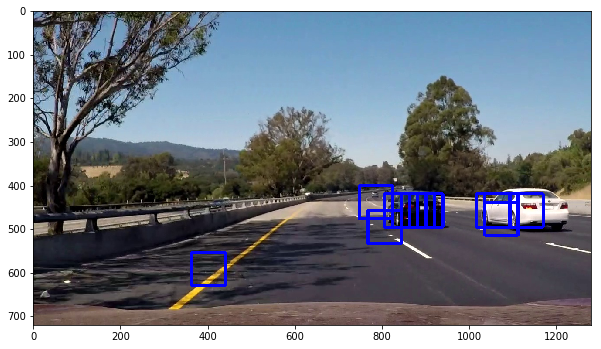

In [4]:
ystart = 400
ystop = 656
scale = 1.2

# image = aux.load_image('test_images/test1.jpg')
image = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame979.jpg')
# image = aux.load_image('test_images/car_test.jpg')
# image = aux.load_image('test_images/test5.jpg')
# image = image5
# image = aux.load_image('test_images/bbox-example-image.jpg')

b= aux.find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, plot=True)
# plt.imshow(out_img)

### Heat Map Example
---
The heat map applies "heat" on each box detected on sequential frames.
Later on only the boxes that achieve a threshold heat are considering, therefore eliminating false detections.

Load sequential frames for the heat map

/home/asgalioth/tensorflow/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


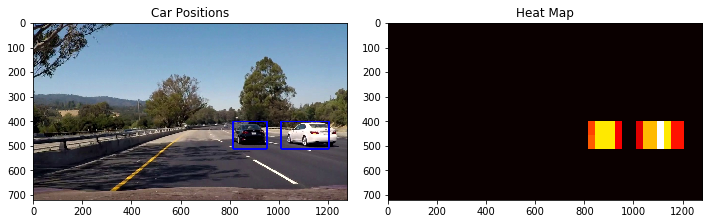

In [5]:
ystart = 400
ystop = 656
scale = 1.75

# image1 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame258.jpg')
# image2 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame259.jpg')
# image3 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame260.jpg')
# image4 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame261.jpg')
# image5 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame262.jpg')

image1 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame973.jpg')
image2 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame974.jpg')
image3 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame975.jpg')
image4 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame976.jpg')
image5 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame977.jpg')
image6 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame978.jpg')
image7 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame979.jpg')
image8 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame980.jpg')
image9 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame981.jpg')
image10 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame982.jpg')

# image1 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame15.jpg')
# image2 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame16.jpg')
# image3 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame17.jpg')
# image4 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame18.jpg')
# image5 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame19.jpg')
# image6 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame20.jpg')
# image7 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame21.jpg')
# image8 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame22.jpg')
# image9 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame23.jpg')
# image10 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame24.jpg')
# image11 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame25.jpg')
# image12 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame26.jpg')
# image13 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame27.jpg')
# image14 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame28.jpg')
# image15 = aux.load_image('../CarND-Advanced-Lane-Lines/Frames/frame29.jpg')

images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10]

box_list = []

for img in images:
    out = aux.find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    box_list += out
    
image = images[-1]
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = aux.add_heat(heat,box_list, overlapping_heat=2)
    
# Apply threshold to help remove false positives
heat = aux.apply_threshold(heat,np.max(heat)/6)
# heat = aux.apply_threshold(heat,24)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = aux.label(heatmap)
draw_img = aux.draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

In [53]:
np.max(heat)

1.0

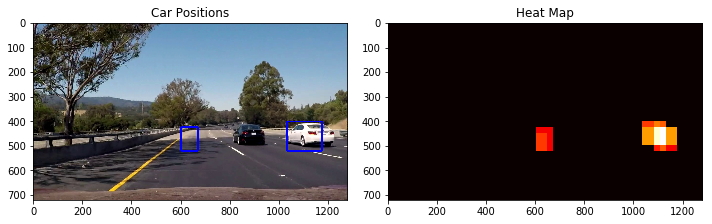

In [10]:
image = images[-1]
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = aux.add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = aux.apply_threshold(heat,6)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = aux.label(heatmap)
draw_img = aux.draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

### Define Heatmap Function
---
This

In [7]:
np.linspace(1.5, 2.0, num=3)

array([ 1.5 ,  1.75,  2.  ])

In [12]:
def get_car_boxes(image):
    ystart = 400
    ystop = 656
    scale_list = np.linspace(1.5, 2.0, num=3)
    
    box_list = []

    for scale in scale_list:
        out = aux.find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        box_list += out
        
    return box_list

In [13]:
class Buffer:
    
    def __init__(self, size):
        self.size = size
        self.buff = []
        
    def add(self, elem):
        if len(self.buff) == self.size:
            self.buff.pop(0)
        self.buff.append(elem)
        
    def getFlatten(self):
        flattened_list = [y for x in self.buff for y in x]
        return flattened_list
    
    def isFull(self):
        return len(self.buff) == self.size

In [14]:
BUFFER_SIZE = 10
buffer = Buffer(BUFFER_SIZE)

def pipeline(image):
    global buffer
    
    box_list = get_car_boxes(image)
    buffer.add(box_list)
    
    if buffer.isFull():
        n_frames_boxes = buffer.getFlatten()
        
        heat = np.zeros_like(image[:,:,0]).astype(np.float)
        # Add heat to each box in box list
        heat = aux.add_heat(heat,n_frames_boxes, overlapping_heat=2)
        
        # Apply threshold to help remove false positives
        heat = aux.apply_threshold(heat,np.max(heat)/6)

        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = aux.label(heatmap)
        draw_img = aux.draw_labeled_bboxes(image, labels)
        
        return draw_img
    else:
        return image

In [15]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [22]:
buffer = Buffer(10)

white_output = 'full4.mp4'

# clip1 = VideoFileClip("project_video.mp4").subclip(22,27)

clip1 = VideoFileClip("./project_video.mp4")

white_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!

%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video full4.mp4
[MoviePy] Writing video full4.mp4


100%|█████████▉| 1250/1251 [10:08<00:00,  2.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: full4.mp4 

CPU times: user 10min 15s, sys: 1.59 s, total: 10min 16s
Wall time: 10min 8s
